In [38]:
import pandas as pd
import copy
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
#from public_tests import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
X_train_orig,y_train,X_test_orig,y_test,classes=load_dataset()

In [3]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

In [4]:
y_train[:,25]

array([1], dtype=int64)

In [5]:
X_train_orig.shape

(209, 64, 64, 3)

y=[1], is a cat picture


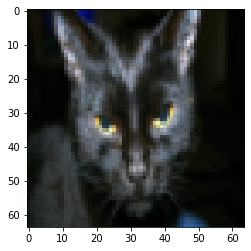

In [6]:
index=25
plt.imshow(X_train_orig[index])
print("y=" +str(y_train[:,index])+ ", is a "+ classes[np.squeeze(y_train[:,index])].decode('utf-8')+ " picture")

In [7]:
m_train=X_train_orig.shape[0]
m_test=X_test_orig.shape[0]
num_px=X_train_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train_orig.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test_orig.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [8]:
X_train_flatten=X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten=X_test_orig.reshape(X_test_orig.shape[0],-1).T

print('Flattened trainig set'+ str(X_train_flatten.shape))
print('Flattened test set'+ str(X_test_flatten.shape))

Flattened trainig set(12288, 209)
Flattened test set(12288, 50)


In [9]:
X_train=X_train_flatten/255
X_test=X_test_flatten/255

In [10]:
def sigmoid(z):
    s=1/(1+1/np.exp(z))
    return s

In [11]:
def initializeToZero(dim):
    w=np.zeros((dim,1))
    b=np.float(0)
    return w,b

In [16]:
def propogate(w,b,X,Y):
    m=X.shape[1]
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    cost=-np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)))/m
                 
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    
    
    grads={'dw':dw,
          'db':db}
    cost=np.squeeze(np.array(cost))
    
    return grads,cost

In [17]:
def optimize(w,b,X,Y,num_iterations=1000,learning_rate=0.09,print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    costs=[]
    for i in range(num_iterations):
        grads,cost=propogate(w,b,X,Y)
        
        dw=grads['dw']
        db=grads['db']
        
        w=w-learning_rate*dw
        b=b-learning_rate*db
        
        if i%100==0:
            costs.append(cost)
            
            if print_cost:
                print('cost at {} th iteration is {} '.format(i,cost))
        
    params={'w':w,
           'b':b}
    grads={'dw':dw,
          'db':db}
    return params,grads,costs

In [24]:
def predict(w,b,X):
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    
    m=X.shape[1]
    Y_prediction=np.zeros((1,m))
    w=w.reshape((X.shape[0],1))
    for i in range(A.shape[1]):
        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction

In [27]:
def model(X_train,y_train,X_test,y_test,num_iterations=1000,learning_rate=0.05,print_cost=False):
    w,b=initializeToZero(X_train.shape[0])
    grads,cost=propogate(w,b,X_train,y_train)
    params,grads,costs=optimize(w,b,X_train,y_train,num_iterations=num_iterations,learning_rate=learning_rate,print_cost=print_cost)
    
    w=params['w']
    b=params['b']
    
    Y_test_predictions=predict(w,b,X_test)
    Y_train_predictions=predict(w,b,X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_train_predictions - y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_test_predictions - y_test)) * 100))
        
    d={"costs": costs,
       "Y_prediction_test": Y_test_predictions, 
         "Y_prediction_train" : Y_train_predictions, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [28]:
log_regression=model(X_train,y_train,X_test,y_test,num_iterations=2000,learning_rate=0.05,print_cost=True)

cost at 0 th iteration is 0.6931471805599453 


<ipython-input-16-f6df7ea182e7>:5: RuntimeWarning: divide by zero encountered in log
  cost=-np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)))/m
<ipython-input-16-f6df7ea182e7>:5: RuntimeWarning: invalid value encountered in multiply
  cost=-np.sum(np.multiply(Y,np.log(A))+np.multiply(1-Y,np.log(1-A)))/m


cost at 100 th iteration is 1.0252720971937779 
cost at 200 th iteration is 9.869147741793876 
cost at 300 th iteration is 9.975164765940905 
cost at 400 th iteration is 1.1283230487676839 
cost at 500 th iteration is 1.9780734439588734 
cost at 600 th iteration is 0.27778608154020823 
cost at 700 th iteration is 0.025948125886281995 
cost at 800 th iteration is 0.01702370428649015 
cost at 900 th iteration is 0.013305392972973605 
cost at 1000 th iteration is 0.011211687693931091 
cost at 1100 th iteration is 0.009838992197608958 
cost at 1200 th iteration is 0.008849985077902096 
cost at 1300 th iteration is 0.008091829707285786 
cost at 1400 th iteration is 0.007485495133529934 
cost at 1500 th iteration is 0.00698569911518391 
cost at 1600 th iteration is 0.0065643310610264075 
cost at 1700 th iteration is 0.0062028204469807904 
cost at 1800 th iteration is 0.005888289335294025 
cost at 1900 th iteration is 0.005611458839906456 
train accuracy: 100.0 %
test accuracy: 68.0 %


Y=[1]is a cat picture


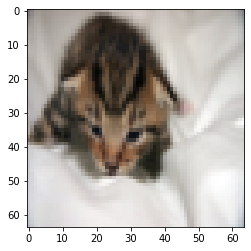

In [34]:
index=1
plt.imshow(X_test[:,index].reshape((num_px,num_px,3)))
print("Y=" + str(y_test[:,index])+ 'is a ' + classes[int(log_regression['Y_prediction_test'][0,index])].decode('utf-8')+ ' picture')

In [29]:
X_test.shape

(12288, 50)

y = 1.0, your algorithm predicts a "cat" picture.


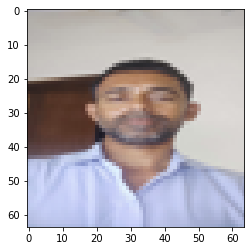

In [41]:
my_image = "Manojwaa.jpeg"   

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(log_regression["w"], log_regression["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")